In [ ]:
import numpy as np 
import pandas as pd 
import bz2
import gc
import chardet
import re
import os

In [ ]:
train_file = bz2.BZ2File('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/train.ft.txt.bz2')
test_file = bz2.BZ2File('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/test.ft.txt.bz2')

In [ ]:
train_file

In [ ]:
train_file_lines = train_file.readlines()
test_file_lines = test_file.readlines()

In [ ]:
train_file_lines = [x.decode('utf-8') for x in train_file_lines]
test_file_lines = [x.decode('utf-8') for x in test_file_lines]

In [ ]:
train_file_lines[:5]

['__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\n',
 "__label__2 The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.\n",
 '__label__2 Amazing!: This s

In [ ]:
train_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in train_file_lines]
train_sentences = [x.split(' ', 1)[1][:-1].lower() for x in train_file_lines]

In [ ]:
train_labels[:5]

[1, 1, 1, 1, 1]

In [ ]:
train_sentences[:5]

In [ ]:
for i in range(len(train_sentences)):
    train_sentences[i] = re.sub('\d','0',train_sentences[i])

In [ ]:
train_sentences[:5]

In [ ]:
print(len(train_sentences))

3600000


In [ ]:
test_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test_file_lines]
test_sentences = [x.split(' ', 1)[1][:-1].lower() for x in test_file_lines]

for i in range(len(test_sentences)):
    test_sentences[i] = re.sub('\d','0',test_sentences[i])

In [ ]:
print(len(test_sentences))

400000


In [ ]:
for i in range(len(train_sentences)):
    if 'www.' in train_sentences[i] or 'http:' in train_sentences[i] or 'https:' in train_sentences[i] or '.com' in train_sentences[i]:
        train_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", train_sentences[i])
        
for i in range(len(test_sentences)):
    if 'www.' in test_sentences[i] or 'http:' in test_sentences[i] or 'https:' in test_sentences[i] or '.com' in test_sentences[i]:
        test_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", test_sentences[i])

In [ ]:
del train_file_lines, test_file_lines

In [ ]:
gc.collect()

397

In [ ]:
train_sentences
train_labels
test_sentences
test_labels

In [ ]:
train_set=pd.concat([pd.DataFrame(train_sentences),pd.DataFrame(train_labels)],axis=1)
train_set.columns=['review','label']
train_set.head()

,review,label
0,stuning even for the non-gamer: this sound tra...,1
1,the best soundtrack ever to anything.: i'm rea...,1
2,amazing!: this soundtrack is my favorite music...,1
3,excellent soundtrack: i truly like this soundt...,1
4,"remember, pull your jaw off the floor after he...",1


In [ ]:
test_set=pd.concat([pd.DataFrame(test_sentences),pd.DataFrame(test_labels)],axis=1)
test_set.columns=['review','label']
test_set.head()

,review,label
0,great cd: my lovely pat has one of the great v...,1
1,one of the best game music soundtracks - for a...,1
2,batteries died within a year ...: i bought thi...,0
3,"works fine, but maha energy is better: check o...",1
4,great for the non-audiophile: reviewed quite a...,1


In [ ]:
train_set.to_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/train_set.csv')
test_set.to_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/test_set.csv')

# Code for re-process text data from Text_analytic Apress

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 01 01:11:02 2016
@author: DIP
"""

CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
import nltk
import spacy
import unicodedata
#from contractions import CONTRACTION_MAP
import re
from nltk.corpus import wordnet
nltk.download('stopwords')
import collections
#from textblob import Word
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
nlp = spacy.load('en', parse=True, tag=True, entity=True)
# nlp_vec = spacy.load('en_vectors_web_lg', parse=True, tag=True, entity=True)



def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    if bool(soup.find()):
        [s.extract() for s in soup(['iframe', 'script'])]
        stripped_text = soup.get_text()
        stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    else:
        stripped_text = text
    return stripped_text


#def correct_spellings_textblob(tokens):
#	return [Word(token).correct() for token in tokens]  


def simple_porter_stemming(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text


def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text


def remove_repeated_characters(tokens):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    match_substitution = r'\1\2\3'
    def replace(old_word):
        if wordnet.synsets(old_word):
            return old_word
        new_word = repeat_pattern.sub(match_substitution, old_word)
        return replace(new_word) if new_word != old_word else new_word
            
    correct_tokens = [replace(word) for word in tokens]
    return correct_tokens


def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text


def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]|\[|\]' if not remove_digits else r'[^a-zA-Z\s]|\[|\]'
    text = re.sub(pattern, '', text)
    return text


def remove_stopwords(text, is_lower_case=False, stopwords=stopword_list):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_stemming=False, text_lemmatization=True, 
                     special_char_removal=True, remove_digits=True,
                     stopword_removal=True, stopwords=stopword_list):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:

        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)

        # remove extra newlines
        doc = doc.translate(doc.maketrans("\n\t\r", "   "))

        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)

        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)

        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)

        # stem text
        if text_stemming and not text_lemmatization:
        	doc = simple_porter_stemming(doc)

        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  

        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)

         # lowercase the text    
        if text_lower_case:
            doc = doc.lower()

        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case, stopwords=stopwords)

        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        doc = doc.strip()
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Ch09a - Sentiment Analysis - Unsupervised Lexical.ipynb

No need to re-process data before training

## Sentiment Analysis with textblob

In [ ]:
import pandas as pd
import numpy as np
#import text_normalizer as tn # specific ebook library
#import model_evaluation_utils as meu # specific ebook library
import nltk
import textblob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
train_set=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/train_set.csv')
test_set=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/test_set.csv')

In [ ]:
print(train_set.shape)
print(test_set.shape)

(3600000, 3)
(400000, 3)


In [ ]:
test_set.head()

,Unnamed: 0,review,label
0,0,great cd: my lovely pat has one of the great v...,1
1,1,one of the best game music soundtracks - for a...,1
2,2,batteries died within a year ...: i bought thi...,0
3,3,"works fine, but maha energy is better: check o...",1
4,4,great for the non-audiophile: reviewed quite a...,1


In [ ]:
reviews = np.array(test_set['review'])
sentiments = np.array(test_set['label'])
split_ratio=0.7
split=int(test_set.shape[0]*0.7)
test_reviews = reviews[split:]
test_sentiments = sentiments[split:]
sample_review_ids = [0, 200, 500]

In [ ]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    print('Predicted Sentiment polarity:', textblob.TextBlob(review).sentiment.polarity)
    print('-'*60)

REVIEW: amazing compositions, performances and recording quality!: having purchased and enjoyed the other 0 star disc of this group i had to see what "closer" was like.this disc is even better in many respects.the compositions are so clever, the arrangements perfect and the recording/mixing are stunning.would love to see a live concert here in new zealand!
Actual Sentiment: 1
Predicted Sentiment polarity: 0.40984848484848485
------------------------------------------------------------
REVIEW: i liked it: great story, no violence, nudity, profanity, a movie everyone can watch and enjoy. i would recommend this movie to anyone
Actual Sentiment: 1
Predicted Sentiment polarity: 0.6
------------------------------------------------------------
REVIEW: poor bob, victim of himself!: awful. i mean, really awful...and i liked "self portrait" because you knew dylan was just trying to have some fun with his image. this album is just a disaster. the lyrics are ok on most songs (i've seen worse by dy

In [ ]:
sentiment_polarity = [textblob.TextBlob(review).sentiment.polarity for review in test_reviews]
predicted_sentiments = [1 if score >= 0.1 else 0 for score in sentiment_polarity]
print(classification_report(test_sentiments,predicted_sentiments))

              precision    recall  f1-score   support

           0       0.83      0.65      0.73     60301
           1       0.71      0.87      0.78     59699

    accuracy                           0.76    120000
   macro avg       0.77      0.76      0.76    120000
weighted avg       0.77      0.76      0.76    120000



## Sentiment Analysis with AFINN

In [ ]:
!pip install afinn
from afinn import Afinn
afn = Afinn(emoticons=True)

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp36-none-any.whl size=53452 sha256=001d03417353dd2aadb3386448da728e155d6b6bf9a505f507cd1799791be206
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


In [ ]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    print('Predicted Sentiment polarity:', afn.score(review))
    print('-'*60)

REVIEW: amazing compositions, performances and recording quality!: having purchased and enjoyed the other 0 star disc of this group i had to see what "closer" was like.this disc is even better in many respects.the compositions are so clever, the arrangements perfect and the recording/mixing are stunning.would love to see a live concert here in new zealand!
Actual Sentiment: 1
Predicted Sentiment polarity: 26.0
------------------------------------------------------------
REVIEW: i liked it: great story, no violence, nudity, profanity, a movie everyone can watch and enjoy. i would recommend this movie to anyone
Actual Sentiment: 1
Predicted Sentiment polarity: 5.0
------------------------------------------------------------
REVIEW: poor bob, victim of himself!: awful. i mean, really awful...and i liked "self portrait" because you knew dylan was just trying to have some fun with his image. this album is just a disaster. the lyrics are ok on most songs (i've seen worse by dylan), but the m

In [ ]:
sentiment_polarity = [afn.score(review) for review in test_reviews]
predicted_sentiments = [1 if score >= 1.0 else 0 for score in sentiment_polarity]
print(classification_report(test_sentiments,predicted_sentiments))

              precision    recall  f1-score   support

           0       0.86      0.50      0.63     60301
           1       0.64      0.92      0.76     59699

    accuracy                           0.71    120000
   macro avg       0.75      0.71      0.69    120000
weighted avg       0.75      0.71      0.69    120000



## Sentiment Analysis with SentiWordNet (VERY LONG, not stable)

In [ ]:
from nltk.corpus import sentiwordnet as swn
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')

awesome = list(swn.senti_synsets('awesome', 'a'))[0]
print('Positive Polarity Score:', awesome.pos_score())
print('Negative Polarity Score:', awesome.neg_score())
print('Objective Score:', awesome.obj_score())

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Positive Polarity Score: 0.875
Negative Polarity Score: 0.125
Objective Score: 0.0


In [ ]:
def analyze_sentiment_sentiwordnet_lexicon(review,
                                           verbose=False):

    # tokenize and POS tag text tokens
    tagged_text = [(token.text, token.tag_) for token in nlp(review)] # from text_normalizer.py
    pos_score = neg_score = token_count = obj_score = 0
    # get wordnet synsets based on POS tags
    # get sentiment scores if synsets are found
    for word, tag in tagged_text:
        ss_set = None
        if 'NN' in tag and list(swn.senti_synsets(word, 'n')):
            ss_set = list(swn.senti_synsets(word, 'n'))[0]
        elif 'VB' in tag and list(swn.senti_synsets(word, 'v')):
            ss_set = list(swn.senti_synsets(word, 'v'))[0]
        elif 'JJ' in tag and list(swn.senti_synsets(word, 'a')):
            ss_set = list(swn.senti_synsets(word, 'a'))[0]
        elif 'RB' in tag and list(swn.senti_synsets(word, 'r')):
            ss_set = list(swn.senti_synsets(word, 'r'))[0]
        # if senti-synset is found        
        if ss_set:
            # add scores for all found synsets
            pos_score += ss_set.pos_score()
            neg_score += ss_set.neg_score()
            obj_score += ss_set.obj_score()
            token_count += 1
    
    # aggregate final scores
    final_score = pos_score - neg_score
    norm_final_score = round(float(final_score) / token_count, 2)
    final_sentiment = 1 if norm_final_score >= 0 else 0
    if verbose:
        norm_obj_score = round(float(obj_score) / token_count, 2)
        norm_pos_score = round(float(pos_score) / token_count, 2)
        norm_neg_score = round(float(neg_score) / token_count, 2)
        # to display results in a nice table
        sentiment_frame = pd.DataFrame([[final_sentiment, norm_obj_score, norm_pos_score, 
                                         norm_neg_score, norm_final_score]],
                                       columns = ['Predicted Sentiment', 'Objectivity',
                                                     'Positive', 'Negative', 'Overall']
                                       #columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
                                       #                      ['Predicted Sentiment', 'Objectivity',
                                        #                      'Positive', 'Negative', 'Overall']], 
                                       #                      labels=[[0,0,0,0,0],[0,1,2,3,4]])
                                       )
        print(sentiment_frame)
        
    return final_sentiment

In [ ]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    pred = analyze_sentiment_sentiwordnet_lexicon(review, verbose=True)    
    print('-'*60)

REVIEW: amazing compositions, performances and recording quality!: having purchased and enjoyed the other 0 star disc of this group i had to see what "closer" was like.this disc is even better in many respects.the compositions are so clever, the arrangements perfect and the recording/mixing are stunning.would love to see a live concert here in new zealand!
Actual Sentiment: 1
   Predicted Sentiment  Objectivity  Positive  Negative  Overall
0                    1         0.81      0.15      0.04     0.11
------------------------------------------------------------
REVIEW: i liked it: great story, no violence, nudity, profanity, a movie everyone can watch and enjoy. i would recommend this movie to anyone
Actual Sentiment: 1
   Predicted Sentiment  Objectivity  Positive  Negative  Overall
0                    1         0.88      0.07      0.06     0.01
------------------------------------------------------------
REVIEW: poor bob, victim of himself!: awful. i mean, really awful...and i lik

In [ ]:
#norm_test_reviews = normalize_corpus(test_reviews)
#predicted_sentiments = [analyze_sentiment_sentiwordnet_lexicon(review, verbose=False) for review in norm_test_reviews]

ZeroDivisionError: ignored

In [ ]:
print(classification_report(test_sentiments,predicted_sentiments))

## Sentiment Analysis with VADER

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [ ]:
def analyze_sentiment_vader_lexicon(review, 
                                    threshold=0.1,
                                    verbose=False):
    # pre-process text
    review = strip_html_tags(review)
    review = remove_accented_chars(review)
    review = expand_contractions(review)
    
    # analyze the sentiment for review
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    # get aggregate scores and final sentiment
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    #1: positive, o: negative
    if verbose:
        # display detailed sentiment statistics
        positive = str(round(scores['pos'], 2)*100)+'%'
        final = round(agg_score, 2)
        negative = str(round(scores['neg'], 2)*100)+'%'
        neutral = str(round(scores['neu'], 2)*100)+'%'
        sentiment_frame = pd.DataFrame([[final_sentiment, final, positive,
                                        negative, neutral]],
                                       columns = ['Predicted Sentiment', 'Polarity Score',
                                                     'Positive', 'Negative', 'Overall']
                                        #columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
                                        #                              ['Predicted Sentiment', 'Polarity Score',
                                         #                              'Positive', 'Negative', 'Neutral']], 
                                          #                    labels=[[0,0,0,0,0],[0,1,2,3,4]])
                                        )
        print(sentiment_frame)
    
    return final_sentiment

In [ ]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    pred = analyze_sentiment_vader_lexicon(review, threshold=0.4, verbose=True)    
    print('-'*60)

REVIEW: amazing compositions, performances and recording quality!: having purchased and enjoyed the other 0 star disc of this group i had to see what "closer" was like.this disc is even better in many respects.the compositions are so clever, the arrangements perfect and the recording/mixing are stunning.would love to see a live concert here in new zealand!
Actual Sentiment: 1
   Predicted Sentiment  Polarity Score Positive Negative Overall
0                    1            0.97    33.0%     0.0%   67.0%
------------------------------------------------------------
REVIEW: i liked it: great story, no violence, nudity, profanity, a movie everyone can watch and enjoy. i would recommend this movie to anyone
Actual Sentiment: 1
   Predicted Sentiment  Polarity Score Positive Negative Overall
0                    1            0.74    38.0%    19.0%   43.0%
------------------------------------------------------------
REVIEW: poor bob, victim of himself!: awful. i mean, really awful...and i lik

In [ ]:
predicted_sentiments = [analyze_sentiment_vader_lexicon(review, threshold=0.4, verbose=False) for review in test_reviews]
print(classification_report(test_sentiments,predicted_sentiments))

              precision    recall  f1-score   support

           0       0.84      0.63      0.72     60301
           1       0.70      0.88      0.78     59699

    accuracy                           0.76    120000
   macro avg       0.77      0.76      0.75    120000
weighted avg       0.77      0.76      0.75    120000



# Ch09b - Sentiment Analysis - Supervised.ipynb

In [ ]:
import pandas as pd
import numpy as np
#import text_normalizer as tn
#import model_evaluation_utils as meu
import nltk

np.set_printoptions(precision=2, linewidth=80)

In [ ]:
train_set=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/train_set.csv')
test_set=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/test_set.csv')
print(train_set.shape)
print(test_set.shape)
test_set.head()

(3600000, 3)
(400000, 3)


,Unnamed: 0,review,label
0,0,great cd: my lovely pat has one of the great v...,1
1,1,one of the best game music soundtracks - for a...,1
2,2,batteries died within a year ...: i bought thi...,0
3,3,"works fine, but maha energy is better: check o...",1
4,4,great for the non-audiophile: reviewed quite a...,1


In [ ]:
reviews = np.array(train_set['review'])
sentiments = np.array(train_set['label'])
# build train and test datasets
train_reviews = reviews[:35000]
train_sentiments = sentiments[:35000]
test_reviews = reviews[35000:50000]
test_sentiments = sentiments[35000:50000]

In [ ]:
# normalize datasets
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('but')
stop_words.remove('not')

norm_train_reviews = normalize_corpus(train_reviews, stopwords=stop_words)
norm_test_reviews = normalize_corpus(test_reviews, stopwords=stop_words)

In [ ]:
pd.DataFrame(norm_train_reviews).to_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/norm_train_reviews.csv')
pd.DataFrame(norm_test_reviews).to_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/norm_test_reviews.csv')

## Traditional Supervised Machine Learning Models

### Feature Engineering (LOAD FILE AFTER PRE PROCESS BENGIN HERE)

In [ ]:
norm_train_reviews=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/norm_train_reviews.csv')
norm_test_reviews=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/norm_test_reviews.csv')
norm_train_reviews=norm_train_reviews['0']
norm_test_reviews=norm_test_reviews['0']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(norm_train_reviews)
# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_reviews)

In [ ]:
# transform test reviews into features
cv_test_features = cv.transform(norm_test_reviews)
tv_test_features = tv.transform(norm_test_reviews)

In [ ]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (35000, 816540)  Test features shape: (15000, 816540)
TFIDF model:> Train features shape: (35000, 816540)  Test features shape: (15000, 816540)


### Model Training, Prediction and Performance Evaluation

In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', max_iter=100)

model on BOW features

In [ ]:
lr.fit(cv_train_features, train_sentiments)
y_pred = lr.predict(cv_test_features)
print(classification_report(test_sentiments,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7143
           1       0.89      0.90      0.90      7857

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
svm.fit(cv_train_features, train_sentiments)
y_pred = svm.predict(cv_test_features)
print(classification_report(test_sentiments,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      7143
           1       0.90      0.89      0.90      7857

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



model on TF-IDF features

In [ ]:
lr.fit(tv_train_features, train_sentiments)
y_pred = lr.predict(tv_test_features)
print(classification_report(test_sentiments,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7143
           1       0.89      0.89      0.89      7857

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



In [ ]:
svm.fit(tv_train_features, train_sentiments)
y_pred = svm.predict(tv_test_features)
print(classification_report(test_sentiments,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      7143
           1       0.90      0.89      0.89      7857

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



## Newer Supervised Deep Learning Models

In [ ]:
import gensim
import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from sklearn.preprocessing import LabelEncoder
from keras.layers.normalization import BatchNormalization

### Prediction class label encoding

In [ ]:
#norm_train_reviews
#norm_test_reviews
#train_sentiments
#test_sentiments

In [ ]:
# tokenize train reviews & encode train labels
tokenized_train = [tokenizer.tokenize(text)
                   for text in norm_train_reviews]
# tokenize test reviews & encode test labels
tokenized_test = [tokenizer.tokenize(text)
                   for text in norm_test_reviews]

In [ ]:
print(tokenized_train[0])

['stun', 'even', 'non', 'gamer', 'sound', 'track', 'beautiful', 'paint', 'senery', 'mind', 'well', 'would', 'recomend', 'even', 'people', 'hate', 'vid', 'game', 'music', 'play', 'game', 'chrono', 'cross', 'but', 'game', 'ever', 'play', 'good', 'music', 'back', 'away', 'crude', 'keyboarding', 'take', 'fresher', 'step', 'grate', 'guitar', 'soulful', 'orchestra', 'would', 'impress', 'anyone', 'care', 'listen']


### Feature Engineering with word embeddings

feature engineering with word2vec

In [ ]:
%%time
# build word2vec model
w2v_num_features = 512
w2v_model = gensim.models.Word2Vec(tokenized_train, size=w2v_num_features, window=150,
                                   min_count=10, sample=1e-3, workers=16)

CPU times: user 1min 27s, sys: 231 ms, total: 1min 27s
Wall time: 45.9 s


In [ ]:
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [ ]:
# generate averaged word vector features from word2vec model
avg_wv_train_features = averaged_word2vec_vectorizer(corpus=tokenized_train, model=w2v_model,
                                                     num_features=w2v_num_features)
avg_wv_test_features = averaged_word2vec_vectorizer(corpus=tokenized_test, model=w2v_model,
                                                    num_features=w2v_num_features)

In [ ]:
print(avg_wv_train_features.shape)
print(avg_wv_test_features.shape)

(35000, 512)
(15000, 512)


In [ ]:
avg_wv_test_features

array([[-0.09,  0.1 , -0.25, ..., -0.28,  0.37, -0.39],
       [-0.16,  0.02, -0.11, ..., -0.39,  0.35, -0.46],
       [-0.06, -0.05,  0.22, ...,  0.06,  0.08,  0.16],
       ...,
       [ 0.41,  0.37, -0.44, ..., -0.  ,  0.16, -0.19],
       [ 0.46,  0.69, -0.52, ..., -0.03,  0.08, -0.22],
       [-0.04,  0.05,  0.2 , ...,  0.02,  0.03, -0.12]])

In [ ]:
#!python -m spacy download en_vectors_web_lg

In [ ]:
!python -m spacy link en_vectors_web_lg en_vectors_web_lg_link

✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_vectors_web_lg -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en_vectors_web_lg_link
You can now load the model via spacy.load('en_vectors_web_lg_link')


In [ ]:
nlp_vec = spacy.load('en_vectors_web_lg_link', parse=True, tag=True, entity=True)

feature engineering with GloVe model

In [ ]:
# feature engineering with GloVe model
train_nlp = [nlp_vec(item) for item in norm_train_reviews]
train_glove_features = np.array([item.vector for item in train_nlp])

test_nlp = [nlp_vec(item) for item in norm_test_reviews]
test_glove_features = np.array([item.vector for item in test_nlp])

In [ ]:
# feature engineering with GloVe model
#Replace nlp_vec = nlp (space.load('en') instead of 'en_vectors_web_lg')
#train_nlp = [nlp(item) for item in norm_train_reviews]
#train_glove_features = np.array([item.vector for item in train_nlp])

#test_nlp = [nlp(item) for item in norm_test_reviews]
#test_glove_features = np.array([item.vector for item in test_nlp])

In [ ]:
train_glove_features

array([[-0.02,  0.16, -0.15, ..., -0.02,  0.01,  0.18],
       [-0.16,  0.2 , -0.08, ..., -0.11,  0.12,  0.05],
       [-0.04,  0.2 , -0.11, ..., -0.07,  0.04,  0.13],
       ...,
       [-0.07,  0.02, -0.12, ..., -0.15,  0.1 ,  0.03],
       [-0.17,  0.06, -0.15, ..., -0.12,  0.07, -0.03],
       [-0.21,  0.05, -0.16, ..., -0.2 ,  0.17,  0.03]], dtype=float32)

In [ ]:
print('Word2Vec model:> Train features shape:', avg_wv_train_features.shape, ' Test features shape:', avg_wv_test_features.shape)
print('GloVe model:> Train features shape:', train_glove_features.shape, ' Test features shape:', test_glove_features.shape)

Word2Vec model:> Train features shape: (35000, 512)  Test features shape: (15000, 512)
GloVe model:> Train features shape: (35000, 300)  Test features shape: (15000, 300)


### Modeling with deep neural networks

In [ ]:
def construct_deepnn_architecture(num_input_features):
    dnn_model = Sequential()
    dnn_model.add(Dense(512, input_shape=(num_input_features,), kernel_initializer='glorot_uniform'))
    dnn_model.add(BatchNormalization())
    dnn_model.add(Activation('relu'))
    dnn_model.add(Dropout(0.2))
    
    dnn_model.add(Dense(512, kernel_initializer='glorot_uniform'))
    dnn_model.add(BatchNormalization())
    dnn_model.add(Activation('relu'))
    dnn_model.add(Dropout(0.2))
    
    dnn_model.add(Dense(512, kernel_initializer='glorot_uniform'))
    dnn_model.add(BatchNormalization())
    dnn_model.add(Activation('relu'))
    dnn_model.add(Dropout(0.2))
    
    dnn_model.add(Dense(1))
    dnn_model.add(Activation('softmax'))

    dnn_model.compile(loss='binary_crossentropy', optimizer='adam',                 
                      metrics=['accuracy'])
    return dnn_model

Deep learning for w2v

In [ ]:
w2v_num_features

512

In [ ]:
w2v_dnn = construct_deepnn_architecture(num_input_features=w2v_num_features)

In [ ]:
batch_size = 100
w2v_dnn.fit(avg_wv_train_features, train_sentiments, epochs=10, batch_size=batch_size, 
            shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/10
315/315 [==============================] - 7s 23ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 2/10
315/315 [==============================] - 7s 22ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 3/10
315/315 [==============================] - 7s 22ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 4/10
315/315 [==============================] - 7s 21ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 5/10
315/315 [==============================] - 7s 22ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 6/10
315/315 [==============================] - 7s 22ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 7/10
315/315 [==============================] - 7s 22ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460

In [ ]:
y_pred = w2v_dnn.predict_classes(avg_wv_test_features)
print(classification_report(test_sentiments,y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7143
           1       0.52      1.00      0.69      7857

    accuracy                           0.52     15000
   macro avg       0.26      0.50      0.34     15000
weighted avg       0.27      0.52      0.36     15000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Deep learning for glove_features

In [ ]:
glove_dnn = construct_deepnn_architecture(num_input_features=300)
batch_size = 100
glove_dnn.fit(train_glove_features, train_sentiments, epochs=10, batch_size=batch_size, 
              shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/10
315/315 [==============================] - 7s 21ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 2/10
315/315 [==============================] - 6s 21ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 3/10
315/315 [==============================] - 6s 20ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 4/10
315/315 [==============================] - 6s 20ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 5/10
315/315 [==============================] - 6s 20ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 6/10
315/315 [==============================] - 6s 20ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460
Epoch 7/10
315/315 [==============================] - 6s 20ms/step - loss: 7.4610 - accuracy: 0.5107 - val_loss: 8.4481 - val_accuracy: 0.4460

In [ ]:
y_pred = glove_dnn.predict_classes(test_glove_features)
print(classification_report(test_sentiments,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7143
           1       0.52      1.00      0.69      7857

    accuracy                           0.52     15000
   macro avg       0.26      0.50      0.34     15000
weighted avg       0.27      0.52      0.36     15000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Ch09c - Sentiment Analysis - Advanced Deep Learning.ipynb

In [ ]:
norm_train_reviews=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/norm_train_reviews.csv')
norm_test_reviews=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/norm_test_reviews.csv')
norm_train_reviews=norm_train_reviews['0']
norm_test_reviews=norm_test_reviews['0']

In [ ]:
print(len(norm_train_reviews))
print(len(norm_test_reviews))

35000
15000


In [ ]:
train_set=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/train_set.csv')
print(train_set.shape)
reviews = np.array(train_set['review'])
sentiments = np.array(train_set['label'])
train_sentiments = sentiments[:35000]
test_sentiments = sentiments[35000:50000]

(3600000, 3)


## Tokenize train & test datasets

In [ ]:
# from text_normalizer.py
tokenized_train = [tokenizer.tokenize(text) for text in norm_train_reviews]
tokenized_test = [tokenizer.tokenize(text) for text in norm_test_reviews]

In [ ]:
print(len(tokenized_train))
print(tokenized_train[0])

35000
['stun', 'even', 'non', 'gamer', 'sound', 'track', 'beautiful', 'paint', 'senery', 'mind', 'well', 'would', 'recomend', 'even', 'people', 'hate', 'vid', 'game', 'music', 'play', 'game', 'chrono', 'cross', 'but', 'game', 'ever', 'play', 'good', 'music', 'back', 'away', 'crude', 'keyboarding', 'take', 'fresher', 'step', 'grate', 'guitar', 'soulful', 'orchestra', 'would', 'impress', 'anyone', 'care', 'listen']


## Build Vocabulary Mapping (word to index)

In [ ]:
from collections import Counter
from itertools import islice

# build word to index vocabulary
token_counter = Counter([token for review in tokenized_train for token in review])
print(len(token_counter))
# see inside token_counter
lengths = Counter()
lengths.update(dict(islice(token_counter.items(), 5)))
print(lengths)

53312
Counter({'even': 5123, 'sound': 2542, 'non': 527, 'gamer': 12, 'stun': 7})


In [ ]:
vocab_map = {item[0]: index+1 for index, item in enumerate(dict(token_counter).items())}
print(len(vocab_map))
# see inside token_counter
lengths = Counter()
lengths.update(dict(islice(vocab_map.items(), 5)))
print(lengths)

53312
Counter({'sound': 5, 'gamer': 4, 'non': 3, 'even': 2, 'stun': 1})


In [ ]:
max_index = np.max(list(vocab_map.values()))
max_index

53312

In [ ]:
vocab_map['PAD_INDEX'] = 0
vocab_map['NOT_FOUND_INDEX'] = max_index+1
vocab_size = len(vocab_map)
# view vocabulary size and part of the vocabulary map
print('Vocabulary Size:', vocab_size)

Vocabulary Size: 53314


In [ ]:
# see inside token_counter
lengths = Counter()
lengths.update(dict(islice(vocab_map.items(), 5)))
print(lengths)

Counter({'sound': 5, 'gamer': 4, 'non': 3, 'even': 2, 'stun': 1})


## Encode and Pad datasets & Encode prediction class labels

In [ ]:
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

# get max length of train corpus and initialize label encoder
le = LabelEncoder()
num_classes=2 # positive -> 1, negative -> 0
max_len = np.max([len(review) for review in tokenized_train])
print(max_len) # So tu nhieu nhat trong 1 cau

146


In [ ]:
## Train reviews data corpus
# Convert tokenized text reviews to numeric vectors
train_X = [[vocab_map[token] for token in tokenized_review] for tokenized_review in tokenized_train]
train_X = sequence.pad_sequences(train_X, maxlen=max_len) # pad 
## Train prediction class labels
# Convert text sentiment labels (negative\positive) to binary encodings (0/1)
train_y = le.fit_transform(train_sentiments)

## Test reviews data corpus
# Convert tokenized text reviews to numeric vectors
test_X = [[vocab_map[token] if vocab_map.get(token) else vocab_map['NOT_FOUND_INDEX'] 
           for token in tokenized_review] 
              for tokenized_review in tokenized_test]
test_X = sequence.pad_sequences(test_X, maxlen=max_len)
## Test prediction class labels
# Convert text sentiment labels (negative\positive) to binary encodings (0/1)
test_y = le.transform(test_sentiments)

# view vector shapes
print('Max length of train review vectors:', max_len)
print('Train review vectors shape:', train_X.shape, ' Test review vectors shape:', test_X.shape)

Max length of train review vectors: 146
Train review vectors shape: (35000, 146)  Test review vectors shape: (15000, 146)


In [ ]:
train_X

array([[    0,     0,     0, ...,    37,    38,    39],
       [    0,     0,     0, ...,    73,    74,    75],
       [    0,     0,     0, ...,   117,   118,    90],
       ...,
       [    0,     0,     0, ...,   248,   110,  1883],
       [    0,     0,     0, ..., 30344,  3014,   418],
       [    0,     0,     0, ...,   110,   985,    42]], dtype=int32)

In [ ]:
train_y

array([1, 1, 1, ..., 0, 0, 0])

## Build the LSTM Model Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, SpatialDropout1D
from keras.layers import LSTM

EMBEDDING_DIM = 128 # dimension for dense embeddings for each token
LSTM_DIM = 64 # total LSTM units
vocab_size # max vocal in transet 53314
max_len # max sequence length 146

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(LSTM_DIM, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 146, 128)          6824192   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 146, 128)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 6,873,665
Trainable params: 6,873,665
Non-trainable params: 0
_________________________________________________________________
None


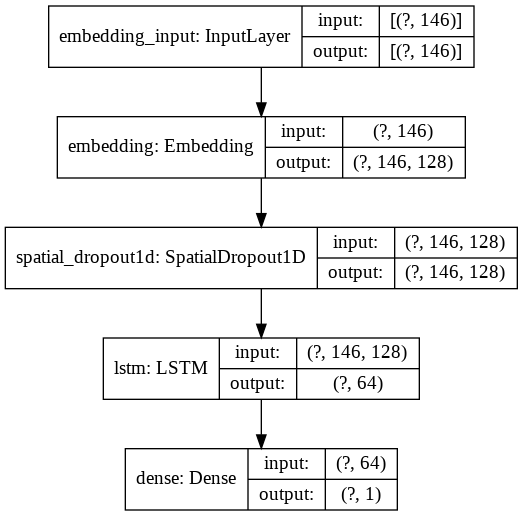

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
batch_size = 100
model.fit(train_X, train_y, epochs=5, batch_size=batch_size, 
          shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/5
315/315 [==============================] - 134s 427ms/step - loss: 0.3204 - accuracy: 0.8678 - val_loss: 0.2869 - val_accuracy: 0.8777
Epoch 2/5
315/315 [==============================] - 132s 419ms/step - loss: 0.1854 - accuracy: 0.9319 - val_loss: 0.3238 - val_accuracy: 0.8723
Epoch 3/5
315/315 [==============================] - 132s 420ms/step - loss: 0.1221 - accuracy: 0.9564 - val_loss: 0.4521 - val_accuracy: 0.8631
Epoch 4/5
315/315 [==============================] - 133s 421ms/step - loss: 0.0807 - accuracy: 0.9721 - val_loss: 0.4570 - val_accuracy: 0.8637
Epoch 5/5
315/315 [==============================] - 131s 416ms/step - loss: 0.0642 - accuracy: 0.9772 - val_loss: 0.4067 - val_accuracy: 0.8703


In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict_classes(test_X)
print(classification_report(test_y,y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7143
           1       0.87      0.87      0.87      7857

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



## CNN model with own embedding

In [ ]:
#Make the necessary imports
import os
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
from keras.models import Model, Sequential
from keras.initializers import Constant

In [ ]:
EMBEDDING_DIM = 128 # dimension for dense embeddings for each token
vocab_size # max vocal in transet 53314 MAX_NUM_WORDS
max_len # max sequence length 146 MAX_SEQUENCE_LENGTH

146

In [ ]:
print("Defining and training a CNN model, training embedding layer on the fly instead of using pre-trained embeddings")
cnnmodel2 = Sequential()
cnnmodel2.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len))
cnnmodel2.add(Conv1D(128, 5, activation='relu'))
cnnmodel2.add(MaxPooling1D(5))
cnnmodel2.add(Conv1D(128, 5, activation='relu'))
#cnnmodel2.add(MaxPooling1D(5))
#cnnmodel2.add(Conv1D(128, 5, activation='relu'))
cnnmodel2.add(GlobalMaxPooling1D())
cnnmodel2.add(Dense(128, activation='relu'))
cnnmodel2.add(Dense(1, activation='softmax'))

cnnmodel2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])
print(cnnmodel2.summary())

Defining and training a CNN model, training embedding layer on the fly instead of using pre-trained embeddings
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 146, 128)          6824192   
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 142, 128)          82048     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 28, 128)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 24, 128)           82048     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________

In [ ]:
print(train_X.shape,train_y.shape)

(35000, 146) (35000,)


In [ ]:
batch_size = 100
cnnmodel2.fit(train_X, train_y, epochs=5, batch_size=batch_size,verbose=1,
              validation_split=0.1)

Epoch 1/5
315/315 [==============================] - 86s 272ms/step - loss: 7.4610 - acc: 0.5107 - val_loss: 8.4481 - val_acc: 0.4460
Epoch 2/5
315/315 [==============================] - 86s 273ms/step - loss: 7.4610 - acc: 0.5107 - val_loss: 8.4481 - val_acc: 0.4460
Epoch 3/5
315/315 [==============================] - 86s 274ms/step - loss: 7.4610 - acc: 0.5107 - val_loss: 8.4481 - val_acc: 0.4460
Epoch 4/5
315/315 [==============================] - 86s 273ms/step - loss: 7.4610 - acc: 0.5107 - val_loss: 8.4481 - val_acc: 0.4460
Epoch 5/5
315/315 [==============================] - 87s 276ms/step - loss: 7.4610 - acc: 0.5107 - val_loss: 8.4481 - val_acc: 0.4460


In [ ]:
#Evaluate on test set:
y_pred = cnnmodel2.predict_classes(test_X)
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7143
           1       0.52      1.00      0.69      7857

    accuracy                           0.52     15000
   macro avg       0.26      0.50      0.34     15000
weighted avg       0.27      0.52      0.36     15000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Kaggle CuDNNLSTM

In [ ]:
import numpy as np 
import pandas as pd 
import bz2
import gc
import chardet
import re
import os
from keras.models import Model, Sequential
from keras.layers import LSTM,Dense, Embedding, Input, Conv1D, GlobalMaxPool1D, Dropout, concatenate, Layer, InputSpec
from keras.preprocessing import text, sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras import activations, initializers, regularizers, constraints
from keras.utils.conv_utils import conv_output_length
from keras.regularizers import l2
from keras.constraints import maxnorm

In [ ]:
#!pip install --upgrade keras

https://www.kaggle.com/anshulrai/cudnnlstm-implementation-93-7-accuracy

In [11]:
norm_train_reviews=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/norm_train_reviews.csv')
norm_test_reviews=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/norm_test_reviews.csv')
norm_train_reviews=norm_train_reviews['0']
norm_test_reviews=norm_test_reviews['0']
print(len(norm_train_reviews))
print(len(norm_test_reviews))

35000
15000


In [12]:
train_set=pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/train_set.csv')
print(train_set.shape)
reviews = np.array(train_set['review'])
sentiments = np.array(train_set['label'])
train_sentiments = sentiments[:35000]
test_sentiments = sentiments[35000:50000]

(3600000, 3)


In [ ]:
max_features = 20000
maxlen = 100

In [ ]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(norm_train_reviews)

In [ ]:
tokenized_train = tokenizer.texts_to_sequences(norm_train_reviews)
X_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [ ]:
print(X_train.shape)
X_train

(35000, 100)


array([[    0,     0,     0, ...,   107,   316,   109],
       [    0,     0,     0, ...,    88,    78,  2396],
       [    0,     0,     0, ...,    30,    34,    75],
       ...,
       [    0,     0,     0, ...,   164,     1,   588],
       [    0,     0,     0, ..., 18416,  1112,  1056],
       [    0,     0,     0, ...,     1,   420,     9]], dtype=int32)

In [ ]:
tokenized_test = tokenizer.texts_to_sequences(norm_test_reviews)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)
print(X_test.shape)

(15000, 100)


In [ ]:
EMBEDDING_FILE = '/content/drive/My Drive/Data/NLP/glove.6B.100d.txt'

In [ ]:
def get_coefs(word, *arr): 
  return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size)) #embedding_matrix = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [ ]:
print(embedding_matrix.shape)
embedding_matrix

(20000, 100)


array([[-3.73279406e-01, -1.08945996e-01, -3.23282658e-01, ...,
        -2.71308239e-01,  2.56275949e-01,  2.68222112e-01],
       [-1.91039994e-01,  1.76009998e-01,  3.69199991e-01, ...,
        -5.96800029e-01,  8.08430016e-02,  2.78659999e-01],
       [-1.97439998e-01,  4.48309988e-01,  1.36889994e-01, ...,
        -5.69679976e-01,  1.53739995e-03,  6.66000009e-01],
       ...,
       [-3.97029996e-01, -4.21180010e-01,  4.91499990e-01, ...,
         2.89440006e-01,  5.59660017e-01,  9.49620008e-01],
       [-4.53359991e-01,  5.52269995e-01,  2.18989998e-01, ...,
        -5.59360027e-01,  1.59140003e+00,  7.47829974e-02],
       [-6.30200028e-01,  1.06739998e+00, -5.99319994e-01, ...,
         7.62539983e-01, -3.41219991e-01,  1.09800005e+00]])

In [ ]:
#del tokenized_test, tokenized_train, tokenizer, word_index, embeddings_index, all_embs, nb_words
#gc.collect()

In [ ]:
batch_size = 2048
epochs = 7
embed_size = 100

In [ ]:
def cudnnlstm_model(conv_layers = 2, max_dilation_rate = 3):
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=True)(inp)
    x = Dropout(0.25)(x)
    x = Conv1D(2*embed_size, kernel_size = 3)(x)
    prefilt = Conv1D(2*embed_size, kernel_size = 3)(x)
    x = prefilt
    for strides in [1, 1, 2]:
        x = Conv1D(128*2**(strides), strides = strides, kernel_regularizer=l2(4e-6), bias_regularizer=l2(4e-6), kernel_size=3, kernel_constraint=maxnorm(10), bias_constraint=maxnorm(10))(x)
    x_f = LSTM(512, kernel_regularizer=l2(4e-6), bias_regularizer=l2(4e-6), kernel_constraint=maxnorm(10), bias_constraint=maxnorm(10))(x)  
    x_b = LSTM(512, kernel_regularizer=l2(4e-6), bias_regularizer=l2(4e-6), kernel_constraint=maxnorm(10), bias_constraint=maxnorm(10))(x)
    x = concatenate([x_f, x_b])
    x = Dropout(0.5)(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.1)(x)
    x = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['binary_accuracy'])

    return model

cudnnlstm_model = cudnnlstm_model()
cudnnlstm_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 100)     2000000     input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 100, 100)     0           embedding[0][0]                  
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 98, 200)      60200       dropout[0][0]                    
_______________________________________________________________________________________

In [ ]:
weight_path="early_weights.hdf5"
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)
callbacks = [checkpoint, early_stopping]

In [ ]:
cudnnlstm_model.fit(X_train, train_sentiments, batch_size=batch_size, 
                    epochs=epochs, shuffle = True, validation_split=0.20, 
                    callbacks=callbacks,verbose=1)

Epoch 1/7
14/14 [==============================] - ETA: 0s - loss: 0.7399 - binary_accuracy: 0.5462
Epoch 00001: val_loss improved from inf to 0.61902, saving model to early_weights.hdf5
14/14 [==============================] - 28s 2s/step - loss: 0.7399 - binary_accuracy: 0.5462 - val_loss: 0.6190 - val_binary_accuracy: 0.6850
Epoch 2/7
14/14 [==============================] - ETA: 0s - loss: 0.6037 - binary_accuracy: 0.6963
Epoch 00002: val_loss improved from 0.61902 to 0.56850, saving model to early_weights.hdf5
14/14 [==============================] - 26s 2s/step - loss: 0.6037 - binary_accuracy: 0.6963 - val_loss: 0.5685 - val_binary_accuracy: 0.8120
Epoch 3/7
14/14 [==============================] - ETA: 0s - loss: 0.5185 - binary_accuracy: 0.7637
Epoch 00003: val_loss improved from 0.56850 to 0.41932, saving model to early_weights.hdf5
14/14 [==============================] - 26s 2s/step - loss: 0.5185 - binary_accuracy: 0.7637 - val_loss: 0.4193 - val_binary_accuracy: 0.8226
Ep

In [ ]:
score, acc = cudnnlstm_model.evaluate(X_test, test_sentiments, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

8/8 [==============================] - 4s 529ms/step - loss: 0.3603 - binary_accuracy: 0.8494
Test score: 0.36029815673828125
Test accuracy: 0.849399983882904


In [ ]:
#Evaluate on test set:

y_pred = cudnnlstm_model.predict(X_test)
y_pred

array([[0.01546661],
       [0.0285088 ],
       [0.8842947 ],
       ...,
       [0.13450688],
       [0.9937104 ],
       [0.96193534]], dtype=float32)

In [ ]:
y_pred=np.round(y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_sentiments,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      7143
           1       0.81      0.93      0.87      7857

    accuracy                           0.85     15000
   macro avg       0.86      0.85      0.85     15000
weighted avg       0.86      0.85      0.85     15000



# Fast text supervised model

One of the fastest and most accessible text classifier to anyone, without GPU

FastText is well known for its distributed representation, which ultimately gets used as an embedding layer in a typical Deep Learning model such as a CNN or an LSTM. However, many don't know that FastText is also a supervised model. To prove the point, this Amazon dataset has been created to support the FastText format. And yet, 6 months later, no one has even tried to post a kernel for using FastText supervised model. What many also don't know is that, it is in fact a pretty good supervised model. Probably one of the fastest and the best out there without using a GPU. I'll cut straight to the chase and demonstrate how this is done. For a full writeup that's about to come soon, check out my blog post here:

https://www.kaggle.com/ejlok1/fasttext-model-91-7

In [ ]:
!pip install fasttext

     |████████████████████████████████| 71kB 2.4MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3020490 sha256=6019c9cc2d643c67ba9e8c1b0b312c5c59914710478088bb6781ad4f9f7e82eb
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import fasttext
import bz2
import csv
from sklearn.metrics import roc_auc_score
import os

In [ ]:
data = bz2.BZ2File('/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/train.ft.txt.bz2')
data = data.readlines()
data = [x.decode('utf-8') for x in data]
print(len(data)) 

3600000


In [ ]:
# 3.6mil rows! Lets inspect a few records to see the format and get a feel for the data
data[1:5]

["__label__2 The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.\n",
 '__label__2 Amazing!: This soundtrack is my favorite music of all time, hands down. The intense sadness of "Prisoners of Fate" (which means all the more if you\'ve played the game) and the hope in "A Distant Promise" and "Girl who Stole the Star" have been an important inspiration to me personally throughout my teen years. The higher energy tracks like "Chrono Cross ~ Time\'s Scar~", "Time of the Dreamwatch", and "Chronomantique" (indefinably remeniscent of Chrono Tri

## Data prep and modelling
A slight inconvenience with the FastText model is the need to save the dataset into a text file. And the annoying encoding of the "__label __#". Basically, the target and the text is all in the same cell. They are distinguished by the prefix of '__label __#'. Lets say if have 2 labels and one is 'Ham' and the other 'Spam', then your labels would be '__label __Ham' and '__label __Spam'. You can include as many labels as well, not just 2.

Thankfully, this dataset has already been formated in that way as you can see from the first 5 records I printed out. We just need to write it out to disk.

In [ ]:
# Data Prep
data = pd.DataFrame(data)
data.to_csv("train.txt", index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

# Modelling
# This routine takes about 5 to 10 minutes 
model = fasttext.train_supervised('train.txt',label_prefix='__label__', thread=4, epoch = 10)
print(model.labels, 'are the labels or targets the model is predicting')

['__label__1', '__label__2'] are the labels or targets the model is predicting


## Apply predictions

Ok after about 10 minutes or so, the model is finished. Now lets apply the predictions to the test dataset. Thankfully, we don't have to write out a physical text file to do the prediction. You could if you want to, but I'm just going to use the data object

In [ ]:
# Load the test data 
test = bz2.BZ2File("/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/test.ft.txt.bz2")
test = test.readlines()
test = [x.decode('utf-8') for x in test]
print(len(test), 'number of records in the test set') 

# To run the predict function, we need to remove the __label__1 and __label__2 from the testset.  
new = [w.replace('__label__2 ', '') for w in test]
new = [w.replace('__label__1 ', '') for w in new]
new = [w.replace('\n', '') for w in new]

# Use the predict function 
pred = model.predict(new)

# check the first record outputs
print(pred[0][0], 'is the predicted label')
print(pred[0][1], 'is the probability score')

400000 number of records in the test set
['__label__2'] is the predicted label
['__label__2'] is the probability score


In [ ]:
# Lets recode the actual targets to 1's and 0's from both the test set and the actual predictions  
labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test]
pred_labels = [0 if x == ['__label__1'] else 1 for x in pred[0]]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels, pred_labels))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92    200000
           1       0.92      0.92      0.92    200000

    accuracy                           0.92    400000
   macro avg       0.92      0.92      0.92    400000
weighted avg       0.92      0.92      0.92    400000



# DistilBert

https://www.kaggle.com/alexalex02/sentiment-analysis-distilbert-amazon-reviews

In [ ]:
!pip install eli5

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import joblib
#import eli5

## EDA

In [3]:
path='/content/drive/My Drive/Data/NLP/Kaggle_Amazone_review_sentiment/train_set.csv'
train_val = pd.read_csv(path, index_col=0)
train_val.reset_index(drop=True, inplace=True)
print(train_val.info())
display(train_val.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   review  object
 1   label   int64 
dtypes: int64(1), object(1)
memory usage: 54.9+ MB
None


,review,label
0,stuning even for the non-gamer: this sound tra...,1
1,the best soundtrack ever to anything.: i'm rea...,1
2,amazing!: this soundtrack is my favorite music...,1
3,excellent soundtrack: i truly like this soundt...,1
4,"remember, pull your jaw off the floor after he...",1


In [4]:
train_val=train_val[:50000]
train_val.shape

(50000, 2)

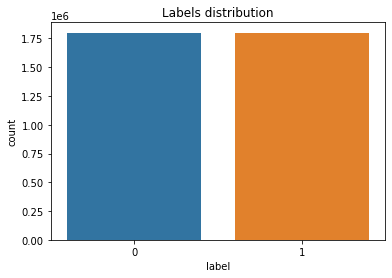

In [ ]:
sns.countplot(train_val['label']);
plt.title('Labels distribution');

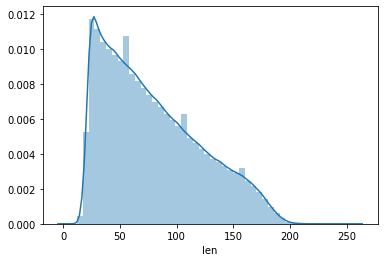

In [ ]:
train_val['len'] = train_val['review'].apply(lambda x: len(x.split()))
sns.distplot(train_val['len']);

Negative mean length: 81.50
Positive mean length: 75.46
Mean Difference: 6.04


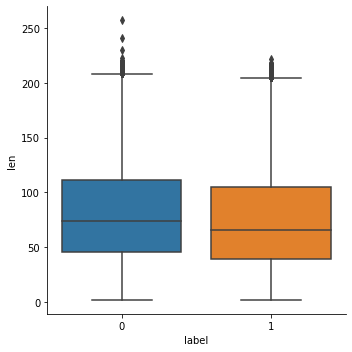

In [ ]:
neg_mean_len = train_val.groupby('label')['len'].mean().values[0]
pos_mean_len = train_val.groupby('label')['len'].mean().values[1]

print(f"Negative mean length: {neg_mean_len:.2f}")
print(f"Positive mean length: {pos_mean_len:.2f}")
print(f"Mean Difference: {neg_mean_len-pos_mean_len:.2f}")
ax = sns.catplot(x='label', y='len', data=train_val, kind='box')

We can see that negative sentences are longer on average. To say how significant this difference, we use permutation testing and calculate p-value.

First, we define a function to generate a permutation sample from two arrays. Then, we generate permutation replicates, which are a single statistic computed from permutation sample. Last, we compute the probability of getting at least 5.91 difference in mean under the hypothesis that the distributions of words are identical.

In [ ]:
neg_array = train_val[train_val['label']==0]['len'].values
pos_array = train_val[train_val['label']==1]['len'].values
mean_diff = neg_mean_len - pos_mean_len

In [ ]:
def permutation_sample(data1, data2):
    # Permute the concatenated array: permuted_data
    data = np.concatenate((data1,data2))
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [ ]:
def draw_perm_reps(data_1, data_2, size=1):

    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = np.mean(perm_sample_1) - np.mean(perm_sample_2)

    return perm_replicates

In [ ]:
perm_replicates = draw_perm_reps(neg_array, pos_array,
                                 size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= mean_diff) / len(perm_replicates)

print(f'p-value = {p}')
# p-value = 0.0

The p-value tells us that the null hypothesis is false.

## Baseline - LogReg (Tf-Idf)

In [ ]:
from sklearn.metrics import classification_report

def prediction(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    pred = model.predict(X_valid)
    acc = accuracy_score(y_valid, pred)
    print(classification_report(y_valid, pred))
    f1 = f1_score(y_valid, pred)
    conf = confusion_matrix(y_valid, pred)
    joblib.dump(model, f"model_acc_{acc:.5f}.pkl")
    return model, acc, f1, conf

In [ ]:
transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3), 
                              lowercase=True, max_features=100000)
X = transformer.fit_transform(train_val['review'])
y = train_val.label

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, 
                                                      random_state=42, stratify=y)
print(X_train.shape, y_train.shape)
X_train

(40000, 100000) (40000,)


<40000x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 1709950 stored elements in Compressed Sparse Row format>

In [ ]:
model = LogisticRegression(C=1, random_state=42, n_jobs=-1)
fit_model, acc, f1, conf = prediction(model, X_train, y_train, X_valid, y_valid)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4899
           1       0.88      0.89      0.89      5101

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
print(f"Accuracy: {acc:.5f}")
print(f"F1_Score: {f1:.5f}")
print(f"Confusion Matrix: {conf}")

Accuracy: 0.88420
F1_Score: 0.88729
Confusion Matrix: [[4284  615]
 [ 543 4558]]


In [ ]:
eli5.show_weights(estimator=fit_model, 
                  feature_names= list(transformer.get_feature_names()),
                    top=(20,20))

Weight?,Feature
+12.115,great
+9.180,excellent
+8.426,best
+7.523,love
+7.140,perfect
+6.802,awesome
+6.031,amazing
+5.904,wonderful
+5.689,favorite
+5.327,easy


## DistilBert

Here we'll use DistilBert from transformers. And catalyst for running experiment.

First, we install torch nightly for Mixed-precision training.

In [ ]:
#!pip install --pre torch==1.7.0.dev20200701+cu101 torchvision==0.8.0.dev20200701+cu101 -f https://download.pytorch.org/whl/nightly/cu101/torch_nightly.html

In [ ]:
!pip install transformers

In [ ]:
!pip install catalyst

In [ ]:
!pip install wandb

In [1]:
import os
os.environ['WANDB_SILENT'] = 'True'
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

from typing import Mapping, List
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

from transformers import AutoConfig, AutoTokenizer, AutoModel

from catalyst.dl import SupervisedRunner
from catalyst.dl.callbacks import AccuracyCallback, OptimizerCallback, CheckpointCallback,WandbLogger
from catalyst.utils import set_global_seed, prepare_cudnn
from catalyst.contrib.nn import RAdam, Lookahead, OneCycleLRWithWarmup
#import wandb

In [ ]:
#!pip install pytorch_lightning

In [ ]:
#import pytorch_lightning as pl
#from pytorch_lightning.loggers import WandbLogger

In [5]:
#Config setup
MODEL_NAME = 'distilbert-base-uncased'
LOG_DIR = "./amazon" 
NUM_EPOCHS = 2 
LEARNING_RATE = 5e-5
MAX_SEQ_LENGTH = 512
BATCH_SIZE = 32
WEIGHT_DECAY = 1e-3
ACCUMULATION_STEPS = 3
SEED = 42
FP_16 = dict(opt_level="O1")

In [6]:
#For reproducibility
set_global_seed(SEED)
prepare_cudnn(deterministic=True, benchmark=True)

We'll create dataset. Instantiate tokenizer. Then, we convert tokens to integers, add special tokens, use padding to max_length. Return 'input_ids', 'attention_mask', 'targets'

In [7]:
class ReviewDataset(Dataset):

    
    def __init__(self,
                 sentences: List[str],
                 labels: List[str] = None,
                 max_seq_length: int = MAX_SEQ_LENGTH,
                 model_name: str = 'distilbert-base-uncased'):

        self.sentences = sentences
        self.labels = labels
        self.max_seq_length = max_seq_length

        self.tokenizer = AutoTokenizer.from_pretrained(model_name)

        
    def __len__(self):

        return len(self.sentences)

    
    def __getitem__(self, index) -> Mapping[str, torch.Tensor]:

        sentence = self.sentences[index]
        encoded = self.tokenizer.encode_plus(sentence, add_special_tokens=True, 
                                        pad_to_max_length=True, max_length=self.max_seq_length, 
                                        return_tensors="pt",)
        
        output = {
            'input_ids': encoded['input_ids'],
            'attention_mask': encoded['attention_mask']
        }
        
        output['targets'] = torch.tensor(self.labels[index], dtype=torch.long)
        
        return output

Making train_test_split, defining datasets and loaders

In [8]:
df_train, df_valid = train_test_split(
            train_val,
            test_size=0.2,
            random_state=42,
            stratify = train_val.label.values
        )
print(df_train.shape, df_valid.shape)

(40000, 2) (10000, 2)


In [9]:
train_dataset = ReviewDataset(
    sentences=df_train['review'].values.tolist(),
    labels=df_train['label'].values,
    max_seq_length=MAX_SEQ_LENGTH,
    model_name=MODEL_NAME
)

valid_dataset = ReviewDataset(
    sentences=df_valid['review'].values.tolist(),
    labels=df_valid['label'].values,
    max_seq_length=MAX_SEQ_LENGTH,
    model_name=MODEL_NAME
)

In [10]:
train_val_loaders = {
    "train": DataLoader(dataset=train_dataset,
                        batch_size=BATCH_SIZE, 
                        shuffle=True, num_workers=2, pin_memory=True),
    "valid": DataLoader(dataset=valid_dataset,
                        batch_size=BATCH_SIZE, 
                        shuffle=False, num_workers=2, pin_memory=True)    
}

In [11]:
print(df_valid.review.values[50])
valid_dataset[50]

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


incredible: this cd is undoubtedly the most impressive cd i have heard in years. aiken truly delivers on his debut album. a great mixture of ballads and pop/rock songs make this cd a must-have. aiken's voice is crisp and clear, flawless and fresh. he certainly has proven he can sing anything given to him.it's great to finally have someone in this era who can have a positive impact on the young and old. he is truly an american idol. i don't know who said you have to promote "sex, violence, and more sex" to be a successful recording artist, but aiken has shown you can make it as a respectful person. cudos to aiken for staying a role model for all!!! i look forward to his other projects.


{'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [12]:
class DistilBert(nn.Module):

    def __init__(self, pretrained_model_name: str = MODEL_NAME, num_classes: int = 2):

        super().__init__()

        config = AutoConfig.from_pretrained(
             pretrained_model_name)

        self.distilbert = AutoModel.from_pretrained(pretrained_model_name,
                                                    config=config)
        self.pre_classifier = nn.Linear(config.dim, config.dim)
        self.classifier = nn.Linear(config.dim, num_classes)
        self.dropout = nn.Dropout(config.seq_classif_dropout)

    def forward(self, input_ids, attention_mask=None, head_mask=None):

        assert attention_mask is not None, "attention mask is none"
        distilbert_output = self.distilbert(input_ids=input_ids,
                                            attention_mask=attention_mask,
                                            head_mask=head_mask)
        hidden_state = distilbert_output[0]  # [BATCH_SIZE=32, MAX_SEQ_LENGTH = 512, DIM = 768]
        pooled_output = hidden_state[:, 0]  # [32, 768]
        pooled_output = self.pre_classifier(pooled_output)  # [32, 768]
        pooled_output = F.relu(pooled_output)  # [32, 768]
        pooled_output = self.dropout(pooled_output)  # [32, 768]
        logits = self.classifier(pooled_output)  # [32, 2]

        return logits

In [13]:
model = DistilBert()

Training setup:

We'll apply weight decay for all parameters except 'bias' and 'LayerNorm'
Lookahead optimizer(improves the learning stability and lowers the variance of its inner optimizer)
OneCycleLRWithWarmup with 0 warmup steps, cosine annealing from 5e-5 to 1e-8.
Gradient accumulation for large batch training.

In [14]:
param_optim = list(model.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']

In [15]:
criterion = nn.CrossEntropyLoss()

base_optimizer = RAdam([
    {'params': [p for n,p in param_optim if not any(nd in n for nd in no_decay)],
     'weight_decay': WEIGHT_DECAY}, 
    {'params': [p for n,p in param_optim if any(nd in n for nd in no_decay)],
     'weight_decay': 0.0}
])
optimizer = Lookahead(base_optimizer)
scheduler = OneCycleLRWithWarmup(
    optimizer, 
    num_steps=NUM_EPOCHS, 
    lr_range=(LEARNING_RATE, 1e-8),
    init_lr=LEARNING_RATE,
    warmup_steps=0,
)

In [16]:
runner = SupervisedRunner(
    input_key=(
        "input_ids",
        "attention_mask"
    )
)
# model training
runner.train(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    loaders=train_val_loaders,
    callbacks=[
        AccuracyCallback(num_classes=2),
        OptimizerCallback(accumulation_steps=ACCUMULATION_STEPS),
        WandbLogger(name="Name", project="sentiment-analysis"),
    ],
    fp16=FP_16,
    logdir=LOG_DIR,
    num_epochs=NUM_EPOCHS,
    verbose=True
)

ValueError: ignored

After two epochs, we’ll able to reach 96.22% accuracy, which is on 6% higher than logistic regression.

To improve our result even more, we can continue fine-tuning with frozen encoder.

Test

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
def prediction(model, sentence: str, max_len: int = 512, device = 'cpu'):
    x_encoded = tokenizer.encode_plus(sentence, add_special_tokens=True, pad_to_max_length=True, max_length=max_len, return_tensors="pt",).to(device)
    logits = model(x_encoded['input_ids'], x_encoded['attention_mask'])
    probabilities = F.softmax(logits.detach(), dim=1)
    output = probabilities.max(axis=1)
    print(sentence)
    print(f"Class: {['Negative' if output.indices[0] == 0 else 'Positive'][0]}, Probability: {output.values[0]:.4f}")

In [ ]:
prediction(plain_model, df_valid['sentences'].values[20])